In [1]:
import tensorflow as tf
from timecaps.model import make_model
from timecaps.model import TimeCaps
from timecaps import layers
from timecaps.param import TimeCapsParam

In [2]:
batch_size: int = 2
signal_len: int = 360
param = TimeCapsParam()

x_sig: tf.Tensor = tf.ones([batch_size, signal_len, 1])
print(x_sig.shape)

(2, 360, 1)


In [3]:
primary_timecaps_a = layers.PrimaryTimeCapsA(param)(x_sig)
print(primary_timecaps_a.shape) # (batch_size, signal_len, param.num_primary_a, param.dim_primary_a)

(2, 360, 8, 8)


In [4]:
timecaps_a = layers.SecondaryTimeCapsA(param)(primary_timecaps_a)
print(timecaps_a.shape) # (batch_size, signal_len, param.num_timecaps_a, param.dim_timecaps)

(2, 360, 8, 8)


In [5]:
primary_timecaps_b = layers.PrimaryTimeCapsB(param)(x_sig)
print(primary_timecaps_b.shape) # (batch_size, signal_len/param.num_segments_b, param.num_segments_b, param.tot_primary_b)

(2, 36, 10, 32)


In [6]:
timecaps_b = layers.SecondaryTimeCapsB(param)(primary_timecaps_b)
print(timecaps_b.shape) # (batch_size, signal_len, param.num_timecaps_b, param.dim_timecaps)

(2, 36, 10, 8)


In [7]:
timecaps = layers.ConcatTimeCaps(param)([timecaps_a, timecaps_b])
num_timecaps = int(signal_len * (param.num_timecaps_a + param.num_timecaps_b/param.num_segments_b))
print(f"num_timecaps: {num_timecaps}")
print(timecaps.shape) # (batch_size, num_timecaps, param.num_timecaps_b, param.dim_timecaps)

num_timecaps: 3240
(2, 3240, 8)


In [8]:
class_probs = layers.Classifier(param)(timecaps)
print(class_probs.shape) # (batch_size, num_classes, 1)

(2, 13, 1)


In [9]:
model = make_model(param)
model.summary()

Model: "TimeCaps"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_signal (InputLayer)       [(None, 360, 1)]     0                                            
__________________________________________________________________________________________________
convolutional_layer (Conv1D)    (None, 360, 64)      512         input_signal[0][0]               
__________________________________________________________________________________________________
primary_timecaps_a (PrimaryTime (None, 360, 8, 8)    20544       convolutional_layer[0][0]        
__________________________________________________________________________________________________
primary_timecaps_b (PrimaryTime (None, 36, 10, 32)   7232        convolutional_layer[0][0]        
___________________________________________________________________________________________

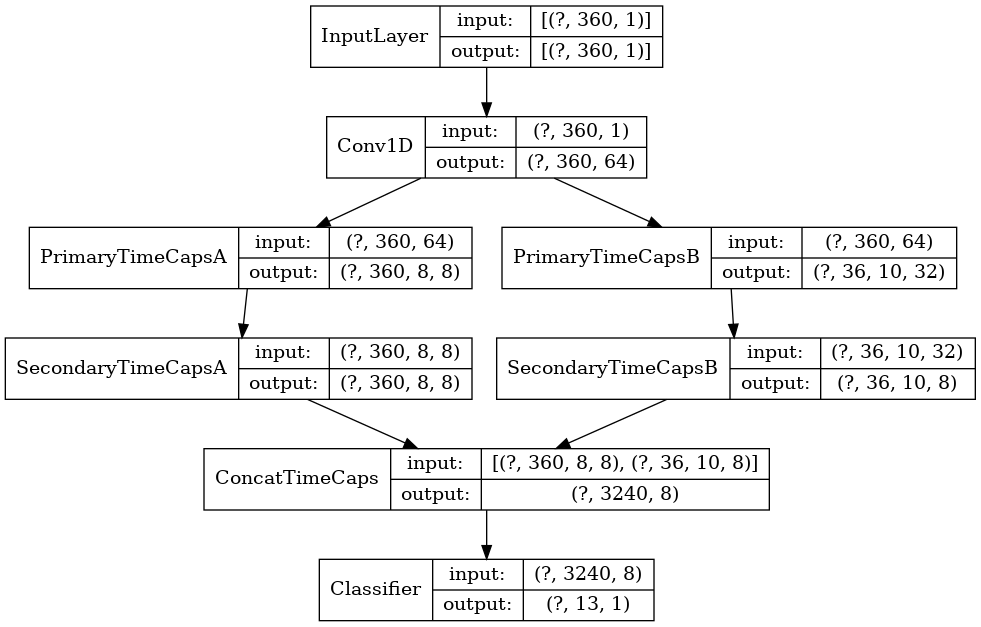

In [10]:
tf.keras.utils.plot_model(model, "./model.png", show_layer_names=False, show_shapes=True)